# K최근접 이웃

가장 단순한 머신러닝 알고리즘

학습속도는 매우 빠르지만 얘측 결과를 걔산하는 속도가 느리다. 

데이터를 그냥 저장하는 것이 학습의 전부

새로 입력된 데이터와 학습된 데이터간의 거리를 측정해서 가장 가까운 거리에 있는 데이터의 결과가 얘측 결과로 결정된다.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

### 분류

In [2]:
df1 = pd.read_csv('forge.csv')
df1.head()

,attr1,attr2,target
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0


In [3]:
X = df1[['attr1', 'attr2']]
y = df1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
# n_neighbors : 이웃의 수, 증가하면 정확도가 점점 올라가다 급격하게 떨어진다.
model1 = KNeighborsClassifier(n_neighbors=10)
model1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [5]:
r1 = model1.score(X_test, y_test)
r1

1.0

In [6]:
df2 = pd.read_csv('breast_cancer.csv')
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df2['target'].value_counts()

benign       357
malignant    212
Name: target, dtype: int64

In [9]:
map1 = {
    'benign' : 0,
    'malignant' : 1
}
df2['target'] = df2['target'].map(map1)
df2['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

In [54]:
X = df2.drop(['target'], axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [56]:
r1 = model2.score(X_test, y_test)
r1

0.9300699300699301

In [57]:
y_pred = model2.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

### 회귀

In [59]:
df3 = pd.read_csv('wave.csv')
df3.head()

,data,target
0,-0.752759,-0.448221
1,2.704286,0.331226
2,1.391964,0.779321
3,0.591951,0.034979
4,-2.063888,-1.387736


In [141]:
# 회귀는 행렬 형태로 되어 있어야 한다.
X = df3['data'].values.reshape(-1, 1)
y = df3['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [142]:
model3 = KNeighborsRegressor(n_neighbors=3)
model3.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [143]:
r3 = model3.score(X_test, y_test)
r3

0.8015688856196899

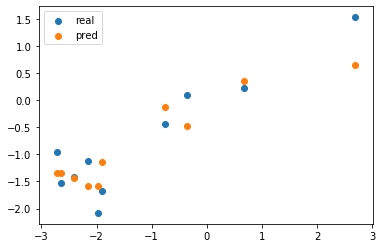

In [144]:
import matplotlib.pyplot as plt

y_pred = model3.predict(X_test)

plt.scatter(X_test, y_test, label='real')
plt.scatter(X_test, y_pred, label='pred')
plt.legend()

In [146]:
df4 = pd.read_csv('boston.csv')
df4.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [170]:
X = df4.drop(['target'], axis=1).values
y = df4['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [171]:
model4 = KNeighborsRegressor(n_neighbors=2)
model4.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

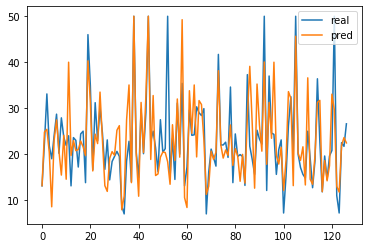

In [172]:
y_pred = model4.predict(X_test)

plt.plot(y_test, label='real')
plt.plot(y_pred, label='pred')
plt.legend()